In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import optuna

In [2]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


# Data Loading

In [3]:
df = pd.read_csv('/kaggle/input/air-quality-and-pollution-assessment/updated_pollution_dataset.csv')

In [4]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [5]:
df.tail()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good
4999,24.1,77.9,81.7,94.3,23.2,10.5,1.38,8.3,461,Moderate


In [6]:
cat = df.select_dtypes(include=['object']).columns
num = df.select_dtypes(include=['int', 'float']).columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [8]:
df[cat].describe()

,Air Quality
count,5000
unique,4
top,Good
freq,2000


In [9]:
df[num].describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [10]:
df.duplicated().sum()

0

Berdasarkan analisis data, tidak ditemukan nilai yang hilang (NaN) atau duplikasi data. Oleh karena itu, tidak diperlukan tindakan pembersihan data lebih lanjut pada dataset ini.

# Exploratory Data Analysis

## Univariate Analysis

In [11]:
def eda_univariate_numeric(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    for col in numeric_columns:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
        
        plt.tight_layout()
        plt.show()
        
def eda_univariate_categorical(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_columns:
        plt.figure(figsize=(12, 6))

        sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')
        plt.title(f'Countplot of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


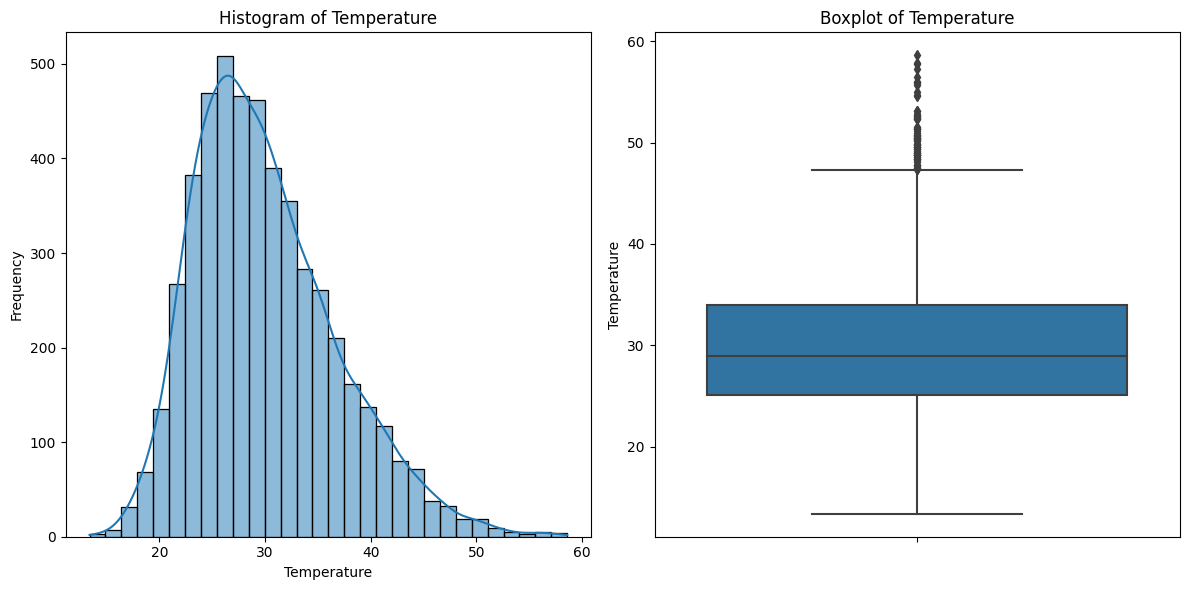

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


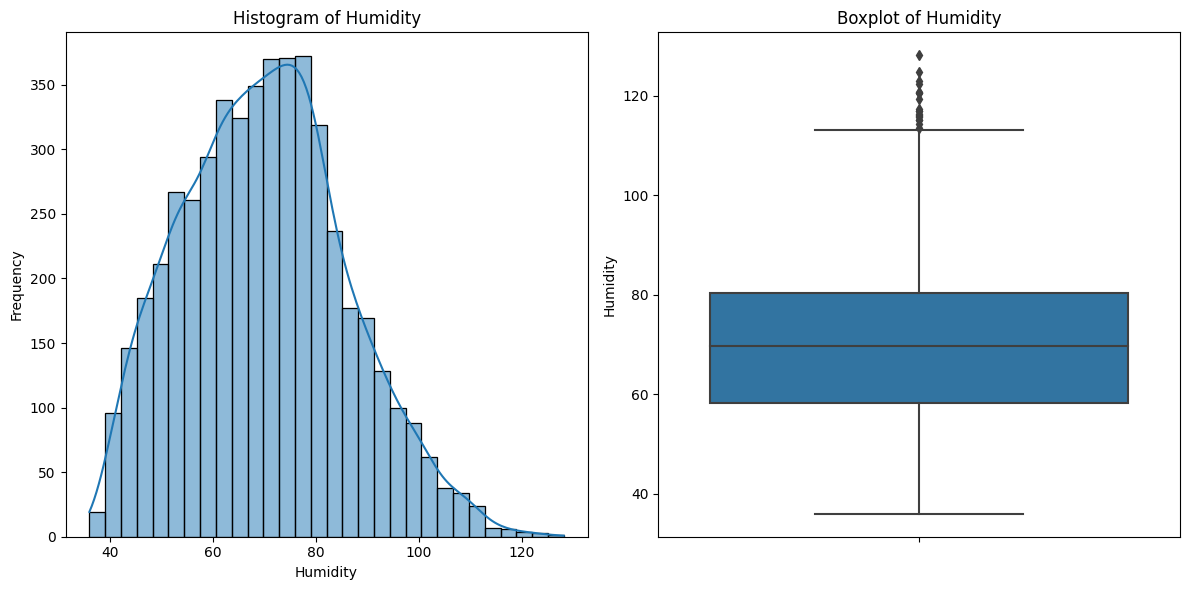

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


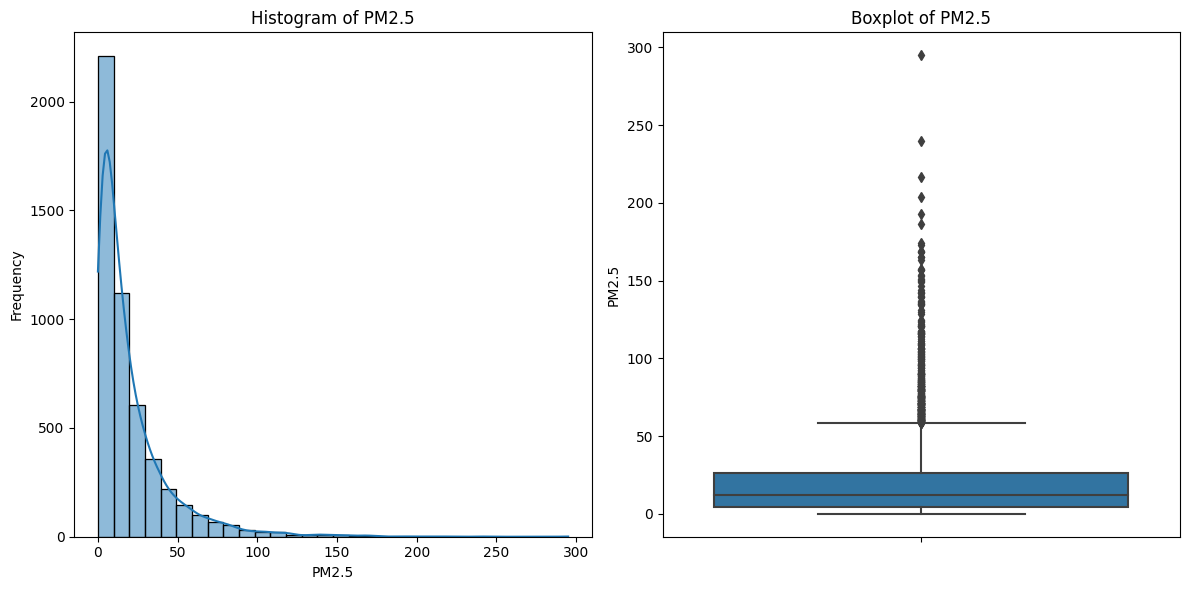

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


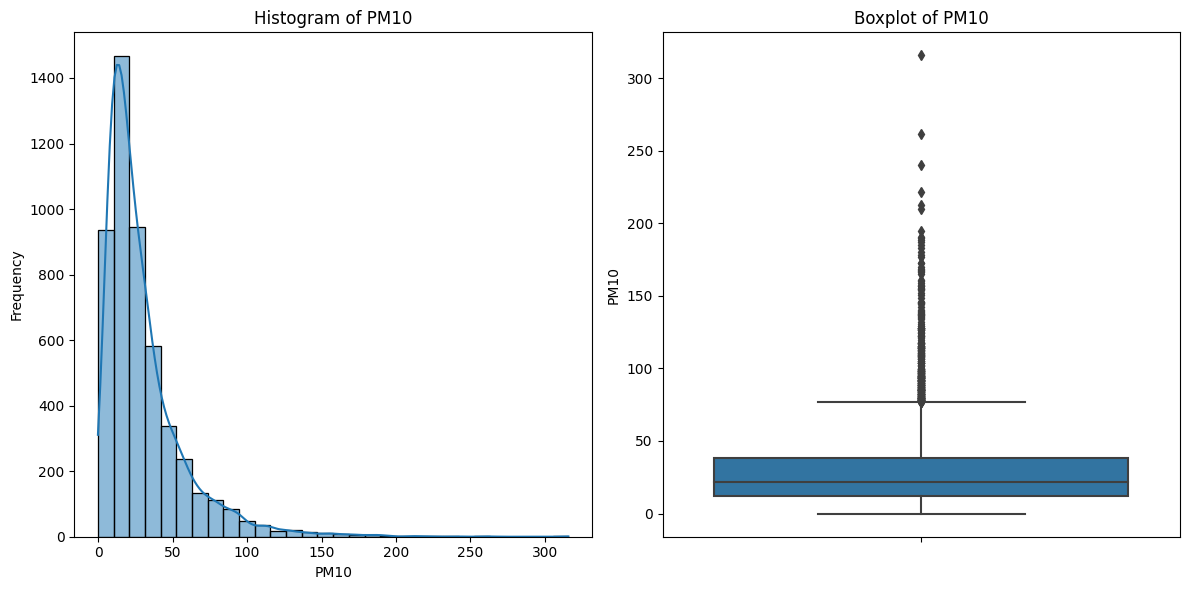

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


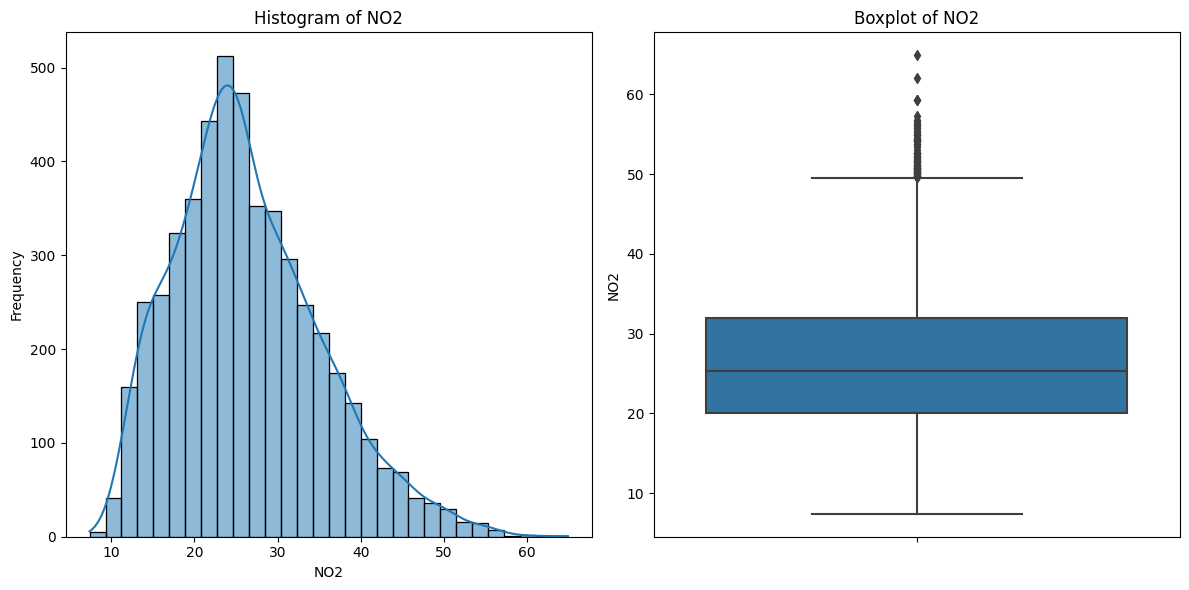

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


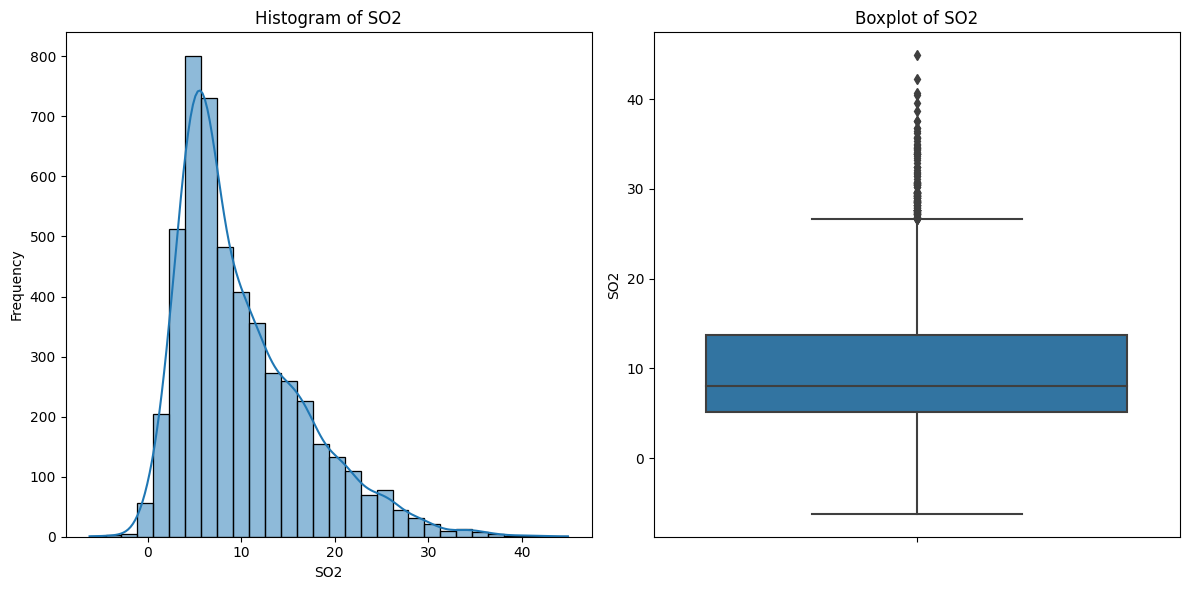

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


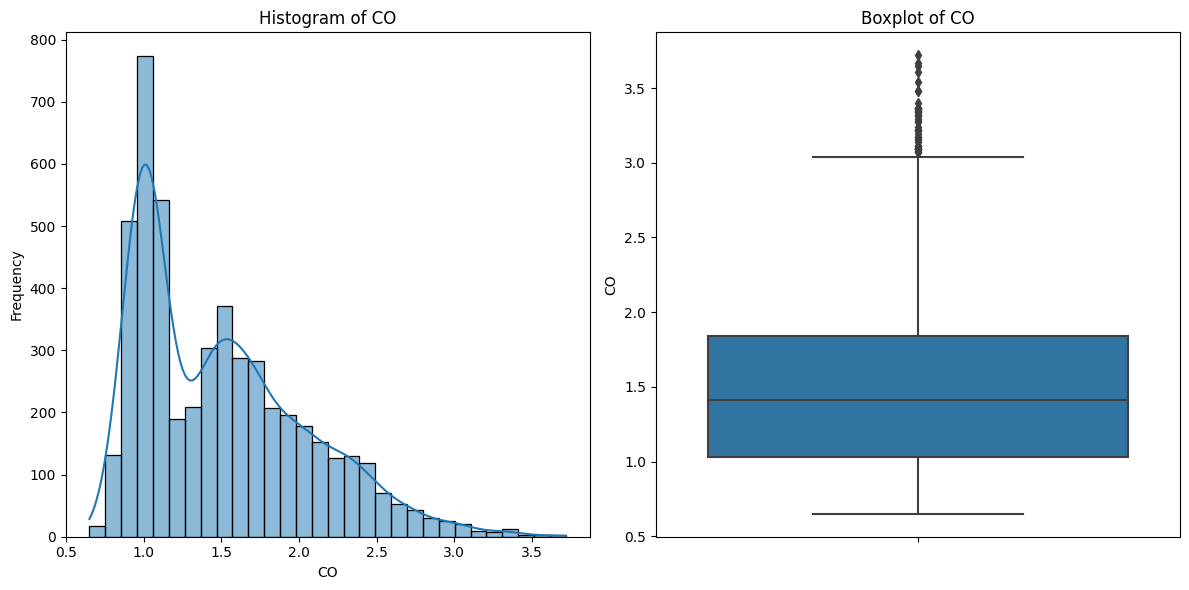

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


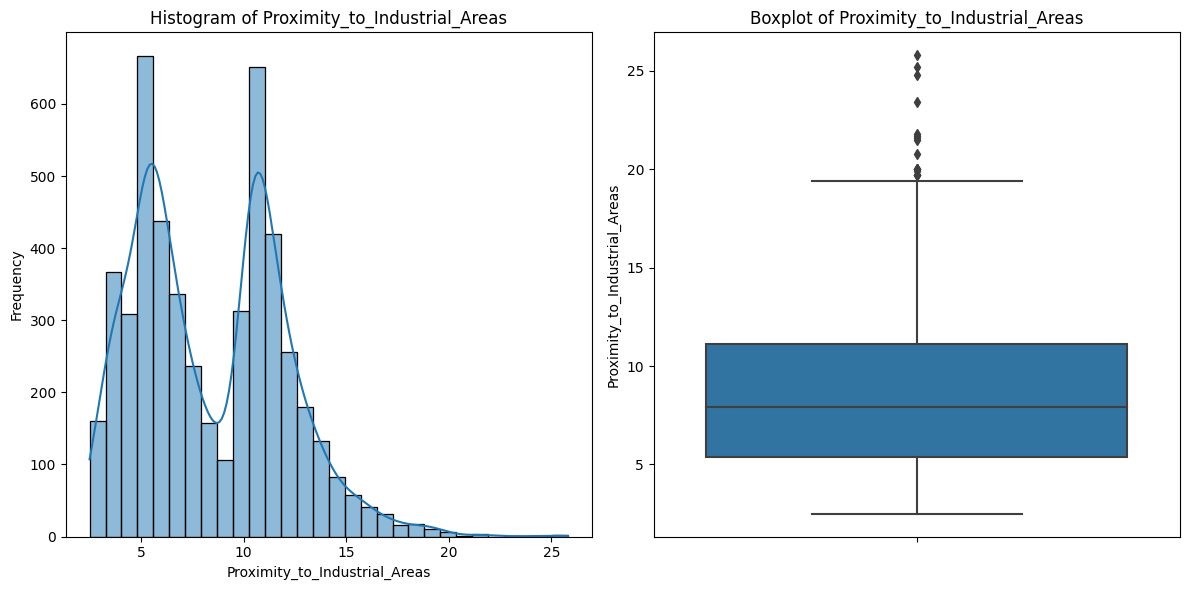

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


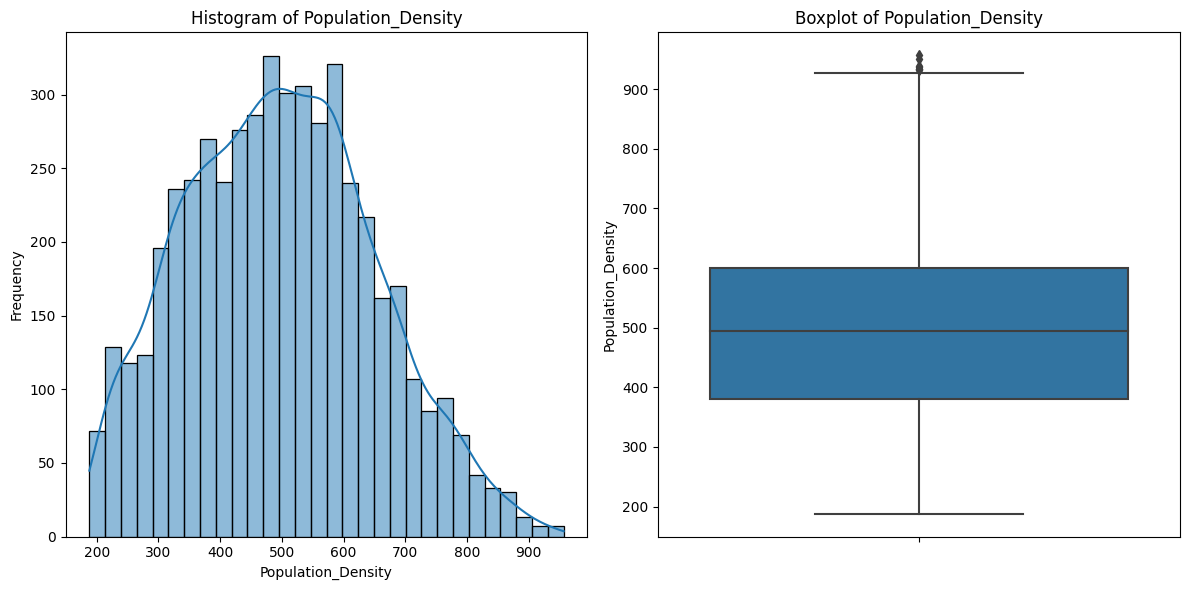

In [12]:
eda_univariate_numeric(df)

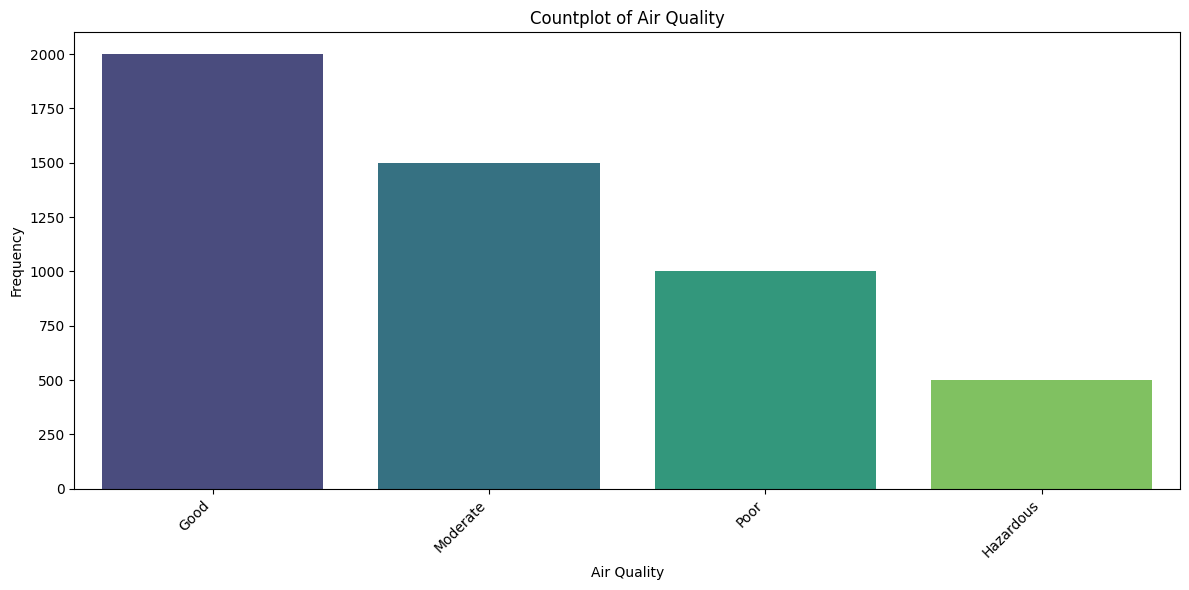

In [13]:
eda_univariate_categorical(df)

In [14]:
print("Class Distribution on Target:")
print(df['Air Quality'].value_counts())

# Cek proporsi kelas
print("\nClass Proportion on Target (in percent)")
print(df['Air Quality'].value_counts(normalize=True) * 100)

Class Distribution on Target:
Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

Class Proportion on Target (in percent)
Air Quality
Good         40.0
Moderate     30.0
Poor         20.0
Hazardous    10.0
Name: proportion, dtype: float64


Hasil visualisasi data menunjukkan adanya outlier signifikan pada fitur PM2.5 dan PM10. Selain itu, distribusi kelas pada data target tidak seimbang.

## Multivariate Analysis

In [15]:
def multivariate_analysis_numeric_heatmap(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    corr_matrix = df[numeric_columns].corr()
    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Heatmap of Correlation Matrix for Numerical Columns')
    plt.show()

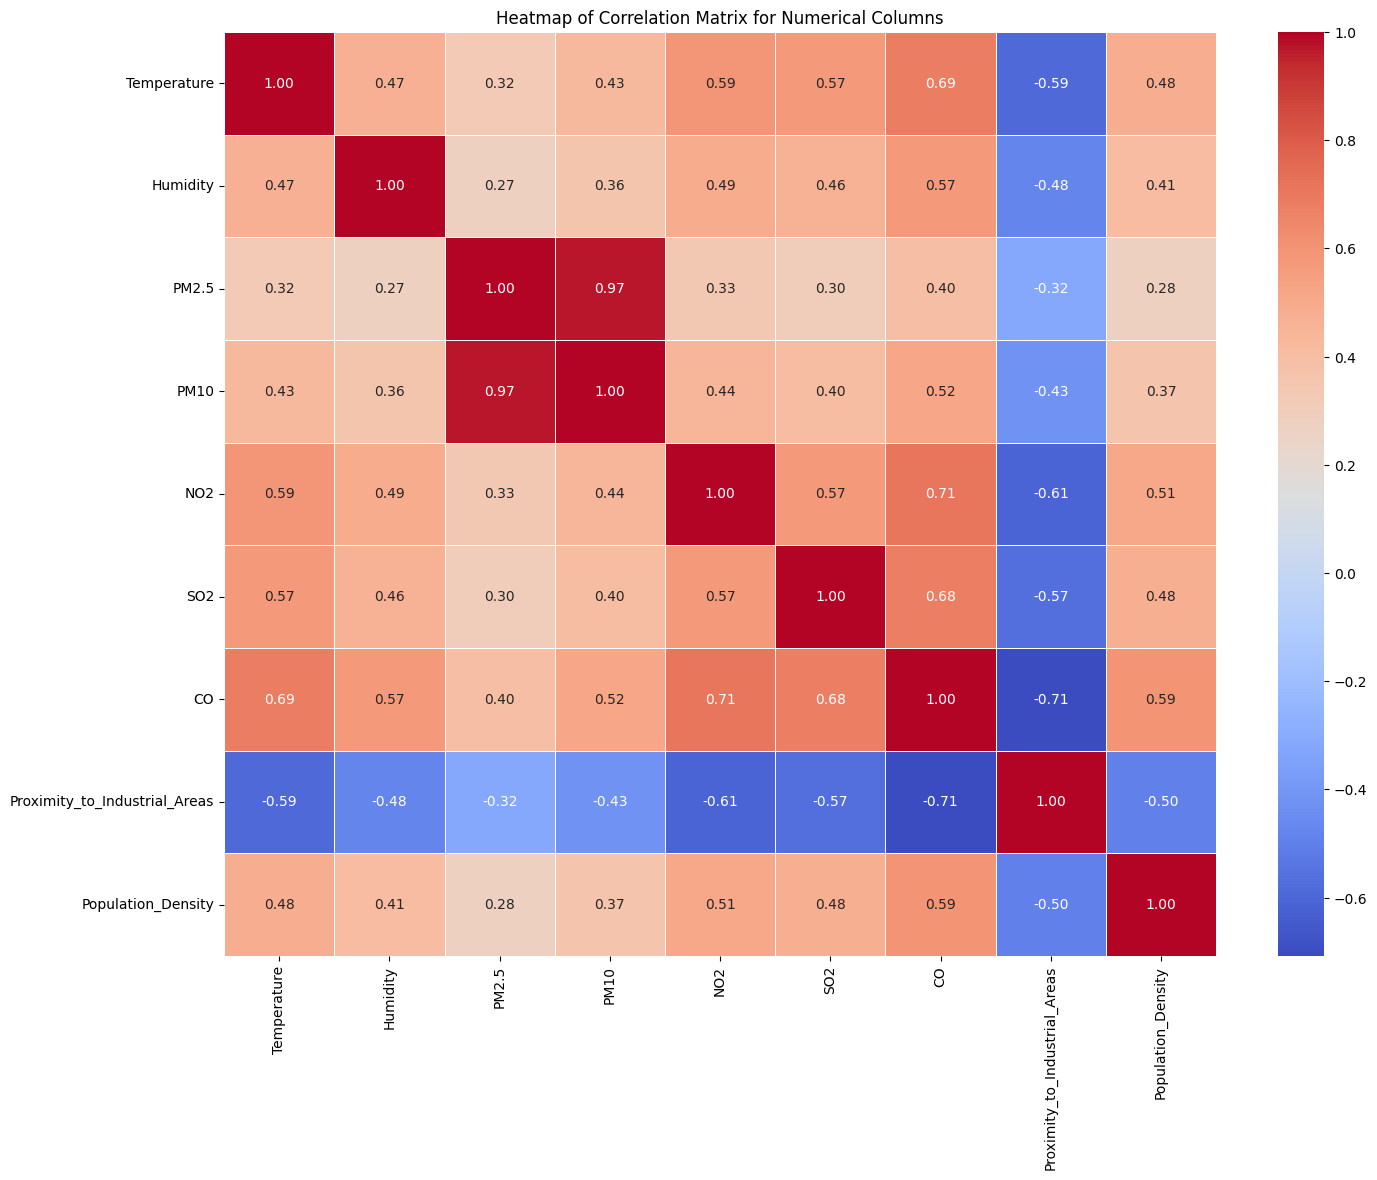

In [16]:
multivariate_analysis_numeric_heatmap(df)

Hasil visualisasi data menunjukan adanya multikolinearitas pada fitur PM2.5 dan PM10 dengan korelasi positif kuat sebesar 97%

# Data Preparation

Pada tahap preparation, hanya label target yang dilakukan label encoding untuk mengubah bentuk data dari kategorikal menjadi numerik. Outlier tidak dihapus karena distribusi data yang memiliki kemiringan ekstrem. Penghapusan outlier berpotensi menghilangkan informasi penting dari data.

In [17]:
label_encoder = LabelEncoder()
df['Air_Quality_Encoded'] = label_encoder.fit_transform(df['Air Quality'])

In [18]:
X = df.drop(['Air Quality', 'Air_Quality_Encoded'], axis=1)
y = df['Air_Quality_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development

## **Pemilihan Model**
Pada tahap model development, saya memilih model berbasis **tree** seperti **Random Forest** dan **XGBoost** karena keduanya memiliki keunggulan yang signifikan dalam menghadapi data dengan karakteristik kompleks, seperti keberadaan **outlier** dan **multikolinearitas** di antara fitur-fitur. Kedua model ini tidak memerlukan asumsi linearitas, sehingga mampu menangkap hubungan non-linear secara efektif. Selain itu, model ini secara inheren melakukan seleksi fitur melalui mekanisme split pada pohon keputusan, yang meningkatkan efisiensi dan interpretabilitas model.

## **Penanganan Ketidakseimbangan Kelas**
Untuk menangani ketidakseimbangan kelas, saya menggunakan **SMOTE (Synthetic Minority Oversampling Technique)**. Teknik ini menghasilkan sampel sintetis untuk kelas minoritas agar distribusi kelas menjadi lebih seimbang.

## **Hyperparameter Tuning**
Saya menggunakan **Optuna** untuk melakukan tuning pada parameter penting untuk masing-masing model:

### **Random Forest**
- **`n_estimators`**: Jumlah pohon dalam ensemble.
- **`max_depth`**: Membatasi kedalaman maksimum pohon untuk mencegah overfitting.
- **`min_samples_split`** dan **`min_samples_leaf`**: Untuk mengontrol jumlah sampel minimum yang dibutuhkan pada setiap split dan leaf.
- **`max_features`**: Subset fitur untuk setiap pohon.

### **XGBoost**
- **`n_estimators`**: Jumlah pohon dalam boosting.
- **`learning_rate`**: Tingkat pembelajaran untuk mengontrol kecepatan pembaruan model.
- **`max_depth`**: Membatasi kedalaman pohon untuk mencegah model menjadi terlalu kompleks.
- **`subsample`** dan **`colsample_bytree`**: Membatasi proporsi data dan fitur yang digunakan untuk meningkatkan generalisasi.
- **Regularisasi (`reg_alpha` dan `reg_lambda`)**: Membantu mencegah overfitting dengan menekan bobot fitur yang tidak signifikan.

## **Evaluasi**
- **Metrik utama**: **F1-Score**, yang memberikan keseimbangan antara **precision** dan **recall**. Ini sangat penting untuk menangani ketidakseimbangan kelas, terutama untuk memprediksi kelas minoritas.

## Random Forest

In [19]:
smote = SMOTE(random_state=42)
X_train_rf, y_train_rf = smote.fit_resample(X_train, y_train)

In [20]:
def objective_rf(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state': 42
    }
    
    model = RandomForestClassifier(**param)
    model.fit(X_train_rf, y_train_rf)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    return report['macro avg']['f1-score']

In [21]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50, timeout=3600)

print("\nRandom Forest Best Hyperparameters:", study_rf.best_params)
print("Random Forest Best F1-Score:", study_rf.best_value)

[I 2025-01-12 12:04:10,879] A new study created in memory with name: no-name-b2088f9c-9d56-42f1-9105-9a2cef8f8bd9
[I 2025-01-12 12:04:15,160] Trial 0 finished with value: 0.9236913557595426 and parameters: {'n_estimators': 426, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.9236913557595426.
[I 2025-01-12 12:04:18,034] Trial 1 finished with value: 0.9275401971010542 and parameters: {'n_estimators': 291, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9275401971010542.
[I 2025-01-12 12:04:28,527] Trial 2 finished with value: 0.9215477453625921 and parameters: {'n_estimators': 318, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 1 with value: 0.9275401971010542.
[I 2025-01-12 12:04:31,740] Trial 3 finished with value: 0.8764703753615943 and parameters: {'n_estimators': 193, 'max_depth': 5, 'min_sa


Random Forest Best Hyperparameters: {'n_estimators': 272, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
Random Forest Best F1-Score: 0.9417515085808432


## XGBoost

In [22]:
smote = SMOTE(random_state=42)
X_train_xgb, y_train_xgb = smote.fit_resample(X_train, y_train)

In [23]:
def objective_xgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'objective': 'multi:softprob',  # Multiklasifikasi
        'num_class': len(np.unique(y_train_xgb)),  # Jumlah kelas
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'random_state': 42
    }
    
    model = XGBClassifier(**param)
    model.fit(X_train_xgb, y_train_xgb)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    return report['macro avg']['f1-score']

In [24]:
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50, timeout=3600)

print("\nXGBoost Best Hyperparameters:", study_xgb.best_params)
print("XGBoost Best Macro F1-Score:", study_xgb.best_value)

[I 2025-01-12 12:07:43,428] A new study created in memory with name: no-name-12f62ad3-0a54-4ef4-b375-4b744ce0f312
[I 2025-01-12 12:07:44,015] Trial 0 finished with value: 0.9326082892817518 and parameters: {'n_estimators': 287, 'learning_rate': 0.12413468711728189, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 0.8667863406931009, 'subsample': 0.8474276943053295, 'colsample_bytree': 0.815446379884731, 'reg_alpha': 0.7698008069550173, 'reg_lambda': 0.32845461200231063}. Best is trial 0 with value: 0.9326082892817518.
[I 2025-01-12 12:07:44,398] Trial 1 finished with value: 0.9364274260680954 and parameters: {'n_estimators': 129, 'learning_rate': 0.08640756004491221, 'max_depth': 10, 'min_child_weight': 8, 'gamma': 1.173621585742568, 'subsample': 0.7755728152115878, 'colsample_bytree': 0.9915737722948876, 'reg_alpha': 0.17550494326484467, 'reg_lambda': 0.025971229624718317}. Best is trial 1 with value: 0.9364274260680954.
[I 2025-01-12 12:07:45,673] Trial 2 finished with value: 0.927768


XGBoost Best Hyperparameters: {'n_estimators': 460, 'learning_rate': 0.016211958020544384, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 2.14097804888009, 'subsample': 0.65971489672372, 'colsample_bytree': 0.6219651596100841, 'reg_alpha': 0.735285067193217, 'reg_lambda': 0.1516188535857984}
XGBoost Best Macro F1-Score: 0.9386253057493296


# Model Evaluation

In [25]:
rf_final = RandomForestClassifier(**study_rf.best_params)
rf_final.fit(X_train_rf, y_train_rf)

rf_y_train_pred = rf_final.predict(X_train_rf)
rf_y_test_pred = rf_final.predict(X_test)

rf_train_f1 = f1_score(y_train_rf, rf_y_train_pred, average='macro')
rf_test_f1 = f1_score(y_test, rf_y_test_pred, average='macro')

print(f"\nRandom Forest Training F1-Score: {rf_train_f1:.2f}")
print(f"Random Forest Testing F1-Score: {rf_test_f1:.2f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_test_pred))


Random Forest Training F1-Score: 0.99
Random Forest Testing F1-Score: 0.94

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.88      0.95      0.91       111
           2       0.97      0.95      0.96       294
           3       0.90      0.87      0.88       186

    accuracy                           0.96      1000
   macro avg       0.93      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



In [26]:
xgb_final = XGBClassifier(**study_xgb.best_params)
xgb_final.fit(X_train_xgb, y_train_xgb)

# Prediksi
xgb_y_train_pred = xgb_final.predict(X_train_xgb)
xgb_y_test_pred = xgb_final.predict(X_test)

# Evaluasi F1-Score
xgb_train_f1 = f1_score(y_train_xgb, xgb_y_train_pred, average='macro')
xgb_test_f1 = f1_score(y_test, xgb_y_test_pred, average='macro')

print(f"\nXGBoost Training F1-Score: {xgb_train_f1:.2f}")
print(f"XGBoost Testing F1-Score: {xgb_test_f1:.2f}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_y_test_pred))


XGBoost Training F1-Score: 0.97
XGBoost Testing F1-Score: 0.93

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.87      0.94      0.90       111
           2       0.97      0.96      0.96       294
           3       0.89      0.87      0.88       186

    accuracy                           0.95      1000
   macro avg       0.93      0.94      0.93      1000
weighted avg       0.95      0.95      0.95      1000



In [27]:
comparison = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Training F1-Score': [rf_train_f1, xgb_train_f1],
    'Testing F1-Score': [rf_test_f1, xgb_test_f1]
})

print("\nModel Comparison:")
print(comparison)



Model Comparison:
           Model  Training F1-Score  Testing F1-Score
0  Random Forest           0.987125          0.937813
1        XGBoost           0.965245          0.934613


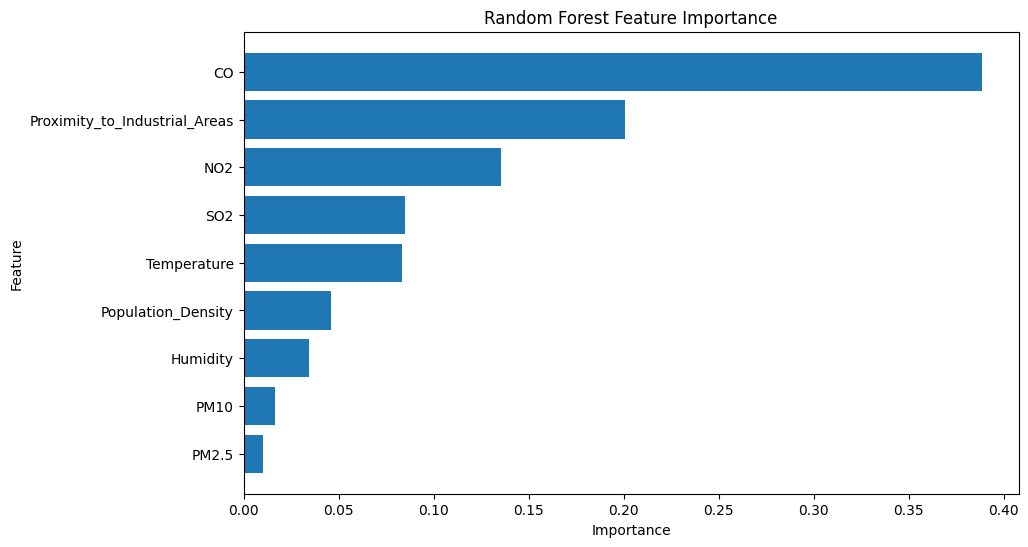


Random Forest Feature Importance:
                         Feature  Importance
6                             CO    0.388527
7  Proximity_to_Industrial_Areas    0.200642
4                            NO2    0.135528
5                            SO2    0.085065
0                    Temperature    0.083409
8             Population_Density    0.045864
1                       Humidity    0.034362
3                           PM10    0.016256
2                          PM2.5    0.010345


In [28]:
feature_importances_rf = rf_final.feature_importances_

feature_names = X_train_rf.columns
importance_rf_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_rf_df['Feature'], importance_rf_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

print("\nRandom Forest Feature Importance:")
print(importance_rf_df)

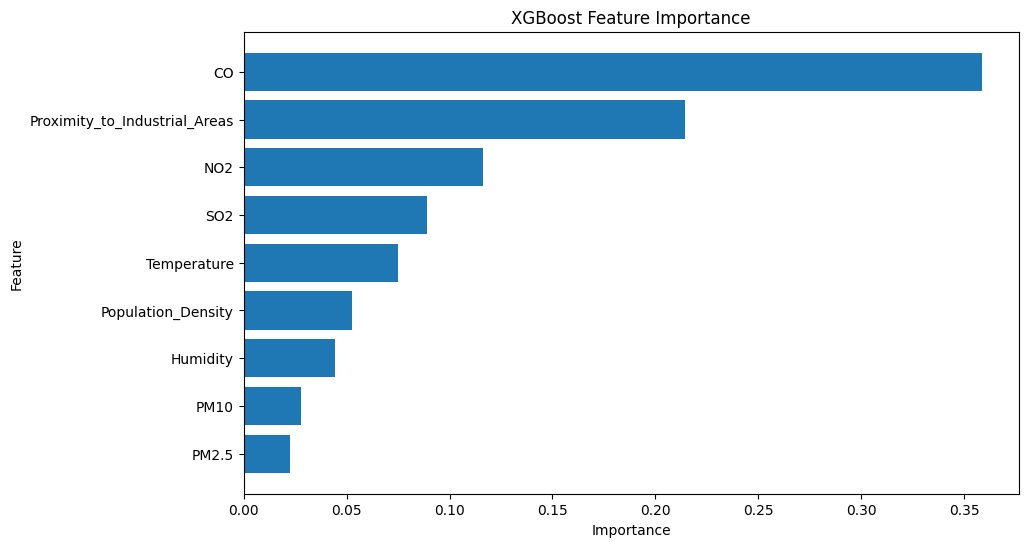


XGBoost Feature Importance:
                         Feature  Importance
6                             CO    0.358477
7  Proximity_to_Industrial_Areas    0.214375
4                            NO2    0.116119
5                            SO2    0.088868
0                    Temperature    0.075157
8             Population_Density    0.052463
1                       Humidity    0.044604
3                           PM10    0.027654
2                          PM2.5    0.022283


In [29]:
feature_importances_xgb = xgb_final.feature_importances_

importance_xgb_df = pd.DataFrame({
    'Feature': X_train_xgb.columns,
    'Importance': feature_importances_xgb
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_xgb_df['Feature'], importance_xgb_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

print("\nXGBoost Feature Importance:")
print(importance_xgb_df)

## **Hasil**
1. **Random Forest**:
   - Memberikan hasil yang stabil dengan performa baik pada data pelatihan dan pengujian.
   - Memiliki sifat robust terhadap dataset dengan banyak fitur.

2. **XGBoost**:
   - Mengungguli Random Forest dalam memaksimalkan F1-Score, terutama untuk kelas dengan jumlah data yang lebih sedikit.
   - Regularisasi dan boosting iteratif membuatnya lebih baik dalam menangkap pola pada dataset kompleks.

3. **Feature Importance**:
   - Analisis feature importance dari kedua model memberikan wawasan terkait fitur yang paling memengaruhi hasil prediksi. Visualisasi ini membantu memahami peran fitur dalam menentukan kualitas udara.
